GoogleNet

In [1]:
#Imports
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 7
Class Names: ['CAT', 'COW', 'DEER', 'FOX', 'HORSE', 'SQUIRREL', 'WOLF']
Device: cuda


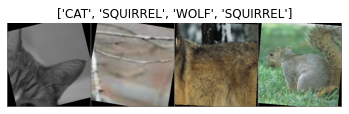

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
googleNet = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
googleNet.eval()

#num_ftrs = googleNet.classifier.in_features
#googleNet.classifier = nn.Linear(num_ftrs, CLASS_COUNTER)

googleNet = googleNet.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(googleNet.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(googleNet)

Using cache found in C:\Users\SsaiyO/.cache\torch\hub\pytorch_vision_v0.10.0


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Epoch 0/99
----------
[TRAIN] Loss: 4.3500 Acc: 0.2707 F1-Score: 0.0625 Precision: 0.1185 Recall: 0.0679
[VALID] Loss: 2.1602 Acc: 0.4577 F1-Score: 0.1127 Precision: 0.1974 Recall: 0.1144

Epoch 1/99
----------
[TRAIN] Loss: 1.6240 Acc: 0.5475 F1-Score: 0.1357 Precision: 0.2009 Recall: 0.1369
[VALID] Loss: 0.7855 Acc: 0.7835 F1-Score: 0.1974 Precision: 0.2377 Recall: 0.1959

Epoch 2/99
----------
[TRAIN] Loss: 1.1629 Acc: 0.6353 F1-Score: 0.1672 Precision: 0.2340 Recall: 0.1591
[VALID] Loss: 0.5631 Acc: 0.8565 F1-Score: 0.2141 Precision: 0.2400 Recall: 0.2141

Epoch 3/99
----------
[TRAIN] Loss: 0.9244 Acc: 0.7162 F1-Score: 0.1845 Precision: 0.2346 Recall: 0.1795
[VALID] Loss: 0.3870 Acc: 0.8908 F1-Score: 0.2223 Precision: 0.2421 Recall: 0.2227

Epoch 4/99
----------
[TRAIN] Loss: 0.7750 Acc: 0.7663 F1-Score: 0.1991 Precision: 0.2422 Recall: 0.1918
[VALID] Loss: 0.3424 Acc: 0.9040 F1-Score: 0.2265 Precision: 0.2444 Recall: 0.2260

Epoch 5/99
----------
[TRAIN] Loss: 0.8476 Acc: 0.7109 

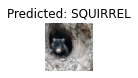

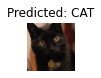

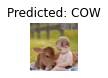

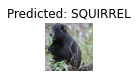

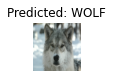

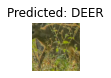

In [5]:
base_model = train_model(googleNet,"googleNet", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

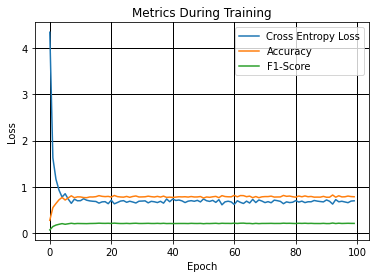

In [6]:
#Plotten
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.plot(f1_Scores, label="F1-Score")
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.title('Metrics During Training');

In [7]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 0.2892 Acc: 0.9182 F1-Score: 0.2305 Precision: 0.2444 Recall: 0.2305
Test complete in 0m 7s
